## Spatial Point Process

### here we uncover an example of marked point process. A marked point process is when the location of the event itself become information for modelling.
### here we try to assess if the dataset in spatstat is a clustered process or a spatially random process

In [1]:
# ggplot2 examples
install.packages("spatstat")

library(spatstat)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘spatstat.data’, ‘spatstat.utils’, ‘deldir’, ‘abind’, ‘tensor’, ‘polyclip’, ‘goftest’


Loading required package: spatstat.data

Loading required package: nlme

Loading required package: rpart


spatstat 1.59-0       (nickname: ‘J'ai omis les oeufs de caille’) 
For an introduction to spatstat, type ‘beginner’ 



Note: R version 3.6.3 (2020-02-29) is more than 9 months old; we strongly recommend upgrading to the latest version



In [2]:
data(gorillas)

gorillas


Marked planar point pattern: 647 points
Mark variables: group, season, date 
window: polygonal boundary
enclosing rectangle: [580457.9, 585934] x [674172.8, 678739.2] metres

### marked locations are mapped on the surface-

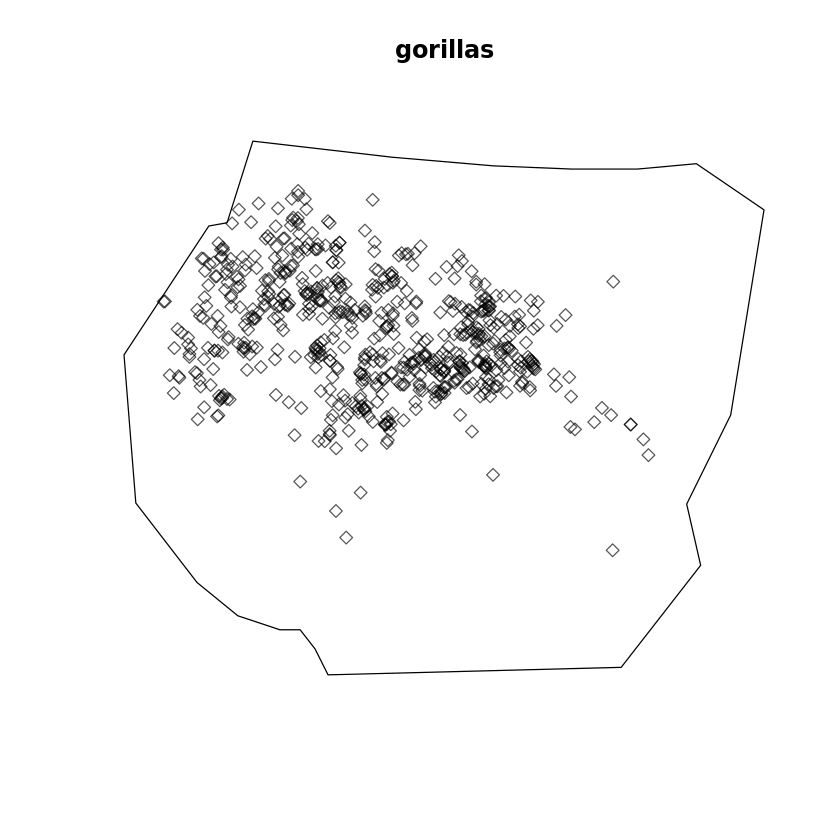

In [3]:
plot(gorillas, use.marks=F, pch=5)

### We can also do a quadrant test to see if there is spatial correlation or not

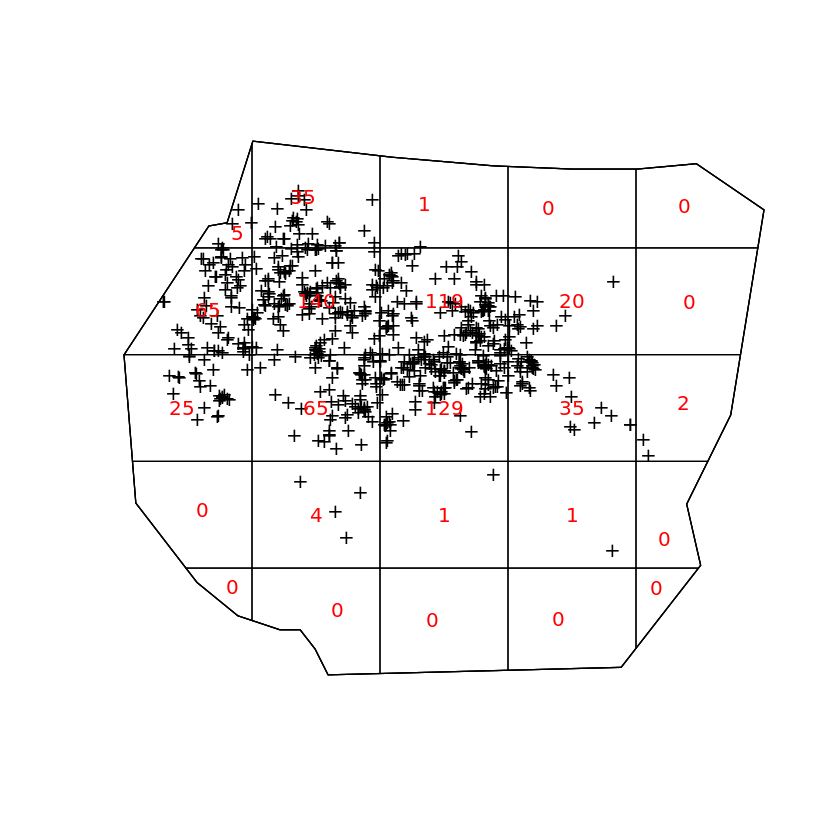

In [4]:
Q <- quadratcount(gorillas, nx=5, ny=5)
plot(gorillas, pch="+", cols=c("black"), use.marks=F, main="")
plot(Q, add=T, col="red")

In [5]:
quadrat.test(gorillas, nx=5, ny=5, method="MonteCarlo", nsim=5000)



	Conditional Monte Carlo test of CSR using quadrat counts
	Pearson X2 statistic

data:  gorillas
X2 = 1325.3, p-value = 0.0003999
alternative hypothesis: two.sided

Quadrats: 25 tiles (irregular windows)

### k function is more accurate measure of seeing if the process is clustered or not. here the k value is greater
### for short distances, that is the process is not completely random but clustered spatially

Generating 39 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,  39.

Done.


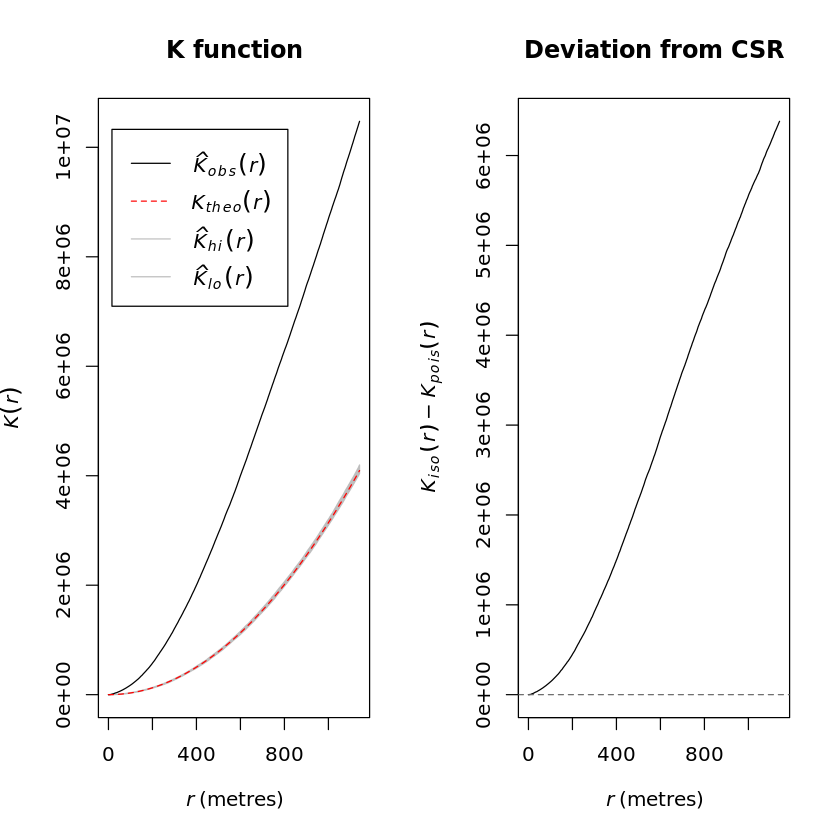

In [6]:
Kc <- Kest(gorillas, correction="Ripley")
par(mfrow=c(1,2))
plot(envelope(gorillas, Kest,nsim=39), main="K function")
plot(Kc, iso - theo ~ r, main="Deviation from CSR")
abline(h=0, lty=2, col="gray40")